# DBSCAN Technique on MC samples

**In this session, we test the DBSCAN technique on our electron MC samples.**

🌼🌹🌻🌺🍀🌸🌼🌷

In [1]:
%load_ext autoreload
%autoreload 2

from emshower import *
from showerrec import *

Welcome to JupyROOT 6.28/04


In [2]:
# data preparation
file = uproot.open("select.root") 
tree = file["tree"]
df = tree.arrays(library="pd")
df.to_csv("select.csv", index=False)
print("CSV file created successfully!")

CSV file created successfully!


In [3]:
print(len(df))
df.head(2)

8798


,evtID,trkID,segnum,PID,pdgID,X,Y,Z,TX,TY,E
0,100162,260,7,0,11,-15049.844727,26997.371094,188501.5,0.001404,-0.008478,2.379458
1,100162,260,7,1,11,-15046.299805,26990.982422,189928.5,0.003390,-0.005603,2.379458


## Step1: Load and Preprocess Input Data

🌼 Let's take one event for example first!

In [16]:
df = pd.read_csv("select.csv")
df_filtered = df[df['evtID'] == 100162] # trial for specific event ID
preprocessed_df = preprocess_data(df_filtered)
print(len(df))
print(len(df_filtered))
preprocessed_df.head(10)

8798
282


,evtID,trkID,segnum,PID,X,Y,Z,TX,TY,E
3654,100162,257,4,0,-15052.260,27003.200,188501.50,-0.000286,-0.000362,200.000000
3655,100162,257,4,1,-15052.654,27003.197,189928.50,-0.005725,-0.001258,38.834454
3656,100162,257,4,2,-15052.934,27007.867,191355.50,0.008153,0.010398,0.756377
3657,100162,257,4,3,-15033.254,27012.275,192782.50,0.014493,0.001068,0.756377
0,100162,260,7,0,-15049.845,26997.371,188501.50,0.001404,-0.008478,2.379458
1,100162,260,7,1,-15046.300,26990.982,189928.50,0.003390,-0.005603,2.379458
2,100162,260,7,3,-15039.282,26978.537,192782.50,0.005067,-0.004207,2.379458
3,100162,260,7,4,-15027.676,26973.502,194209.48,0.007486,-0.007524,2.379458
4,100162,260,7,5,-15019.678,26963.986,195636.48,0.006786,-0.001461,2.379458
5,100162,260,7,6,-15009.383,26957.994,197063.48,0.001824,-0.007004,2.379458


## Step2: Apply DBSCAN Clustering on One Event

🌹 Let's try applying the DBSCAN method on a single event.

🌹 Coming to fitting the centroids, there are two functions `fit_axis` and `fit_robust_axis`. As is implied by their names, `fit_axis` applies common fitting on centroids, while `fit_robust_axis` applies the robust fittings.

🌹 We'll start with common fittings first.

In [17]:
# get the centroids after clustering
centroids = dbscan_for_pid(preprocessed_df)

# Fit the shower axis using centroids
axis_zx, axis_zy = fit_axis(centroids)

# Display the fitted parameters for the X-Z and Y-Z planes
print(f"Fitted parameters for X-Z plane: a={axis_zx[0]:.5f}, b={axis_zx[1]:.5f}")
print(f"Fitted parameters for Y-Z plane: c={axis_zy[0]:.5f}, d={axis_zy[1]:.5f}")

Fitted parameters for X-Z plane: a=-0.00033, b=-14986.07463
Fitted parameters for Y-Z plane: c=-0.00091, d=27179.53152


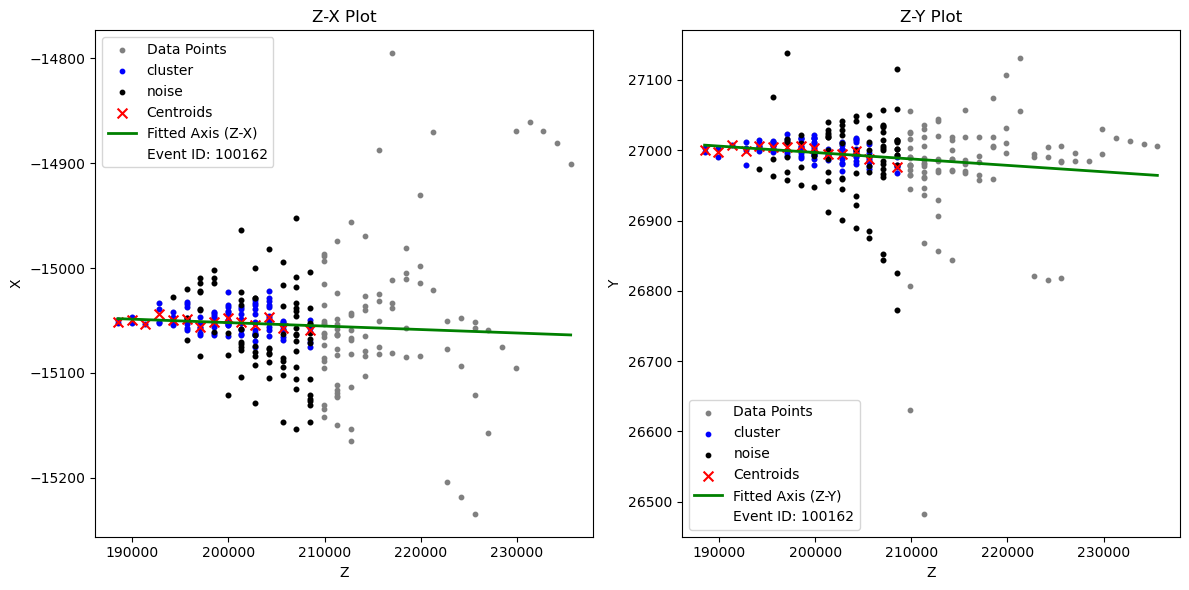

In [18]:
# Plot the results
plot_centroids(preprocessed_df, centroids, axis_zx, axis_zy)

## Step3: Robust Fitting on Centroids

#### Why do we need robust fitting?

🌻 Here we used **RANSAC** method.

🌻 Let's set the robust threshold of X-Z fitting as 5 and Y-Z as well.

Fitted parameters for X-Z plane: a=-0.00040, b=-14973.22700
Fitted parameters for Y-Z plane: c=0.00060, d=26885.46388


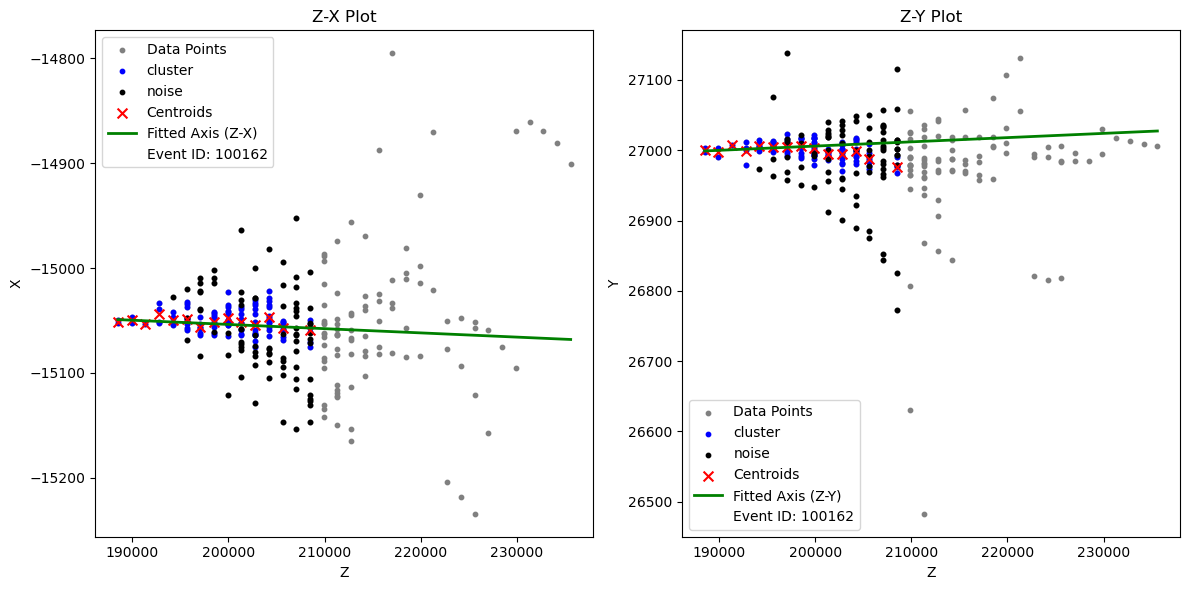

In [30]:
axis_zx, axis_zy = fit_robust_axis(centroids, 5, 5)
print(f"Fitted parameters for X-Z plane: a={axis_zx[0]:.5f}, b={axis_zx[1]:.5f}")
print(f"Fitted parameters for Y-Z plane: c={axis_zy[0]:.5f}, d={axis_zy[1]:.5f}")
plot_centroids(preprocessed_df, centroids, axis_zx, axis_zy)

🌻 From the plot above, you can see that the axis is less infected by the scattering of shower 🍻

🌻 That's exactly why we are including the robust fitting as part of our strategy!

#### Another Event Test

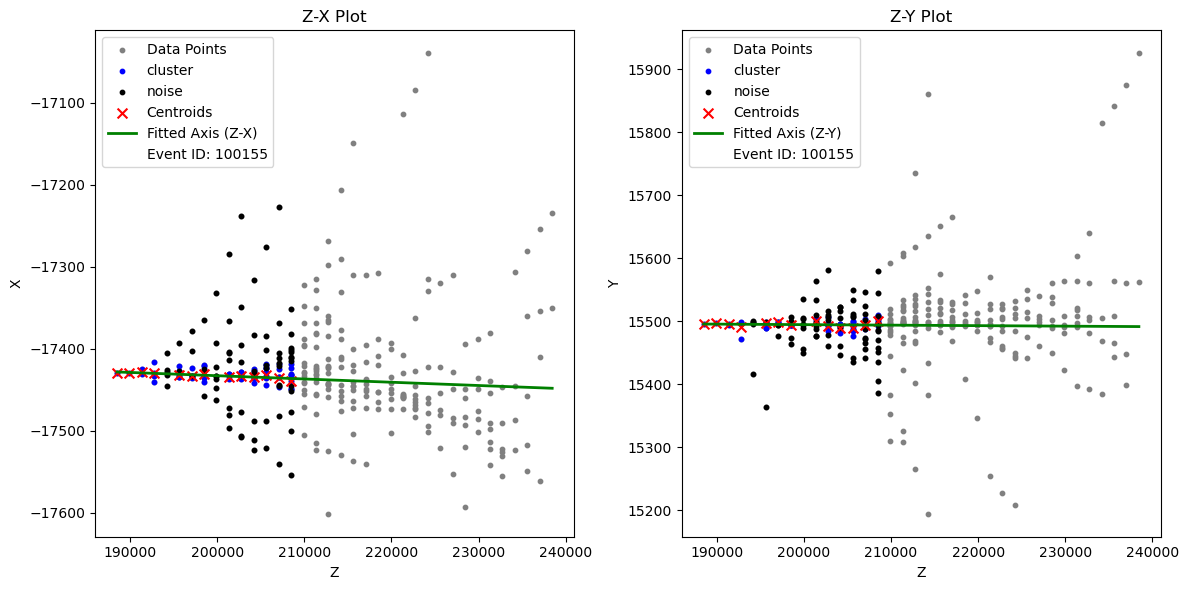

In [32]:
df_filtered = df[df['evtID'] == 100155]
preprocessed_df = preprocess_data(df_filtered)
centroids = dbscan_for_pid(preprocessed_df)
axis_zx, axis_zy = fit_robust_axis(centroids)
plot_centroids(preprocessed_df, centroids, axis_zx, axis_zy)

## DBSCAN Clustering Applied to All

🌺 In the next block, we applied DBSCAN Clustering to all of the MC events. 

🌺 The **angular distributions** obtained by robustly fitting the centroids are also recorded.

In [ ]:
axisIndex = []
axisInfo = [] # store the fitted axis angular distributions

for event in df['evtID'].unique():
    # print("processing event: ", event)
    df_filtered = df[df['evtID'] == event]
    preprocessed_df = preprocess_data(df_filtered)
    centroids = dbscan_for_pid(preprocessed_df)
    axis_zx, axis_zy = fit_robust_axis(centroids)
    axisIndex.append(event)
    axisInfo.append([event, axis_zx[0], axis_zy[0]])

# check the storing order 
for element in axisIndex:
    idx = axisIndex.index(element)
    if axisInfo[idx][0] != element:
        print("index order is wrong!")

Error during RANSAC Z-X fitting: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by RANSACRegressor.
Error during RANSAC Z-Y fitting: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by RANSACRegressor.


In [34]:
len(df['evtID'].unique()) == len(axisInfo)

True

## Angular distributions and Comparison with the old methods

#### **how we match eventID between truth MC and basetracks MC**

🍀 In `/eos/experiment/fasernu-data0/MC/20230701_nuall_200003_150files_eff90/convertHits2CP.cpp`:
```c++
mt->SetMC(runnum*1e5+hit->m_event_id, pdg);
```

🍀 In our case, event IDs between electron MC and truth nue MC are linked by:
```c++
hit->m_event_id+1e5 = df["evtID"]
```

**Now, we reach the axes obtained by our "old method" from the file "shower_MC.root"**

In [39]:
# You can leave alone this block.
# This is for transferring ROOT file into csv form.

import ROOT
axisOld = [0] * len(axisIndex)
fileOld = ROOT.TFile("shower_MC.root")
treeOld = fileOld.Get("tree")
rdf_old = ROOT.RDataFrame(treeOld)
branches = ["eventID", "tanx", "tany"]
df_old = rdf_old.AsNumpy(branches)
df_old = pd.DataFrame(df_old)
df_old.to_csv("axis_old.csv")

Error in <THashList::Delete>: A list is accessing an object (0x35c980e30) already deleted (list name = THashList)


In [44]:
df_old = pd.read_csv("axis_old.csv")
for i, row in df_old.iterrows():
    if (row["eventID"]+1e5) not in axisIndex: continue
    axisOld[axisIndex.index(row["eventID"]+1e5)] = [row["eventID"], row["tanx"], row["tany"]] # keep the indices constant

In [47]:
df_truth = pd.read_csv("nue_truth.csv")
df_truth.head(5)

,Unnamed: 0,m_event_id_MC,m_track_id,m_px,m_py,m_pz
0,0,0,10001,0.336334,1.141396,200000.000000
1,1,0,200001,-0.586493,0.660589,30585.136719
2,2,0,200002,-0.005844,0.028889,443.552368
3,3,0,200003,-0.046420,0.044924,1209.104126
4,4,0,200004,-0.493931,0.437037,23858.273438


#### **Comparison between DBSCAN Method vs Old Method**

🌸 We compare the performances of our new DBSCAN clustering method and our old method by the deviations from truth angular distribution.

🌸 Which means, TX (truth) - TX (estimated) and TY (truth) - TY (estimated).

In [49]:
axisXErr = []
axisYErr = []
axisXErrOld = []
axisYErrOld = []
axisXTruth = []
axisYTruth = []

for i, row in df_truth.iterrows():
    event_id = row["m_event_id_MC"] + 100000
    track_id = row["m_track_id"]
    px = row["m_px"]
    py = row["m_py"]
    pz = row["m_pz"]

    if track_id != 10001: continue
    if event_id not in axisIndex: continue
    txTruth = px / pz
    tyTruth = py / pz
    axisXTruth.append(txTruth)
    axisYTruth.append(tyTruth)

    axisIdx = axisIndex.index(event_id)
    txTest = axisInfo[axisIdx][1]
    tyTest = axisInfo[axisIdx][2]
    txOld = axisOld[axisIdx][1]
    tyOld = axisOld[axisIdx][2]
    
    try:
        '''
        # this is the relative error!
        dTX = abs((txTruth-txTest)/txTruth)
        dTY = abs((tyTruth-tyTest)/tyTruth)
        dTX0 = abs((txTruth-txOld)/txTruth)
        dTY0 = abs((tyTruth-tyOld)/tyTruth)
        '''
        # this is the absolute error
        dTX = txTruth-txTest
        dTY = tyTruth-tyTest
        dTX0 = txTruth-txOld
        dTY0 = tyTruth-tyOld
        # print("event: {}, DBSCAN dTX: \033[31m{:.3f}\033[0m%, Old dTX: \033[31m{:.3f}\033[0m%; DBSCAN dTY: \033[31m{:.3f}\033[0m%, Old dTY: \033[31m{:3f}\033[0m%".format(event_id, dTX, dTX0, dTY, dTY0))
        print("event: {}, DBSCAN dTX: \033[31m{:.3f}\033[0m, Old dTX: \033[31m{:.3f}\033[0m; DBSCAN dTY: \033[31m{:.3f}\033[0m, Old dTY: \033[31m{:3f}\033[0m".format(event_id, dTX, dTX0, dTY, dTY0))

        if((txTruth!=0) & (tyTruth!=0)):
            axisXErr.append(dTX)
            axisYErr.append(dTY)
            axisXErrOld.append(dTX0)
            axisYErrOld.append(dTY0)
    except:
        continue
        # Exception as e:
        #print(f"Found error in event ID {event_id}: {e}")

# axisXErr

event: 100089.0, DBSCAN dTX: 0.000, Old dTX: 0.001; DBSCAN dTY: -0.000, Old dTY: -0.000689
event: 100116.0, DBSCAN dTX: -0.001, Old dTX: -0.001; DBSCAN dTY: -0.002, Old dTY: -0.000687
event: 100123.0, DBSCAN dTX: 0.000, Old dTX: -0.001; DBSCAN dTY: -0.000, Old dTY: -0.000295
event: 100150.0, DBSCAN dTX: -0.000, Old dTX: 0.001; DBSCAN dTY: 0.000, Old dTY: 0.001135
event: 100155.0, DBSCAN dTX: -0.000, Old dTX: -0.001; DBSCAN dTY: 0.000, Old dTY: -0.000559
event: 100160.0, DBSCAN dTX: -0.000, Old dTX: 0.000; DBSCAN dTY: 0.000, Old dTY: -0.000009
event: 100162.0, DBSCAN dTX: 0.000, Old dTX: 0.000; DBSCAN dTY: 0.001, Old dTY: 0.000004
event: 100210.0, DBSCAN dTX: 0.000, Old dTX: 0.001; DBSCAN dTY: 0.001, Old dTY: -0.001040
event: 100225.0, DBSCAN dTX: 0.000, Old dTX: 0.000; DBSCAN dTY: 0.000, Old dTY: -0.000060
event: 100288.0, DBSCAN dTX: 0.000, Old dTX: -0.001; DBSCAN dTY: 0.000, Old dTY: 0.000001
event: 100291.0, DBSCAN dTX: 0.000, Old dTX: -0.000; DBSCAN dTY: 0.000, Old dTY: -0.000780
e

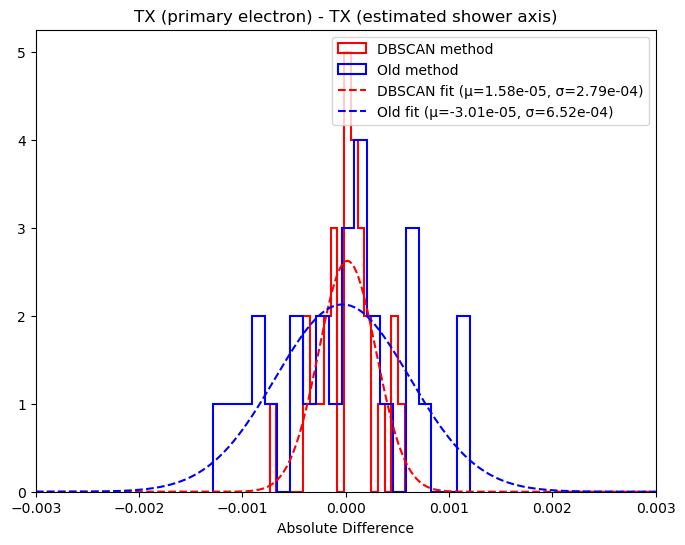

In [52]:
from scipy.stats import norm

# Assuming axisXErr and axisXErrOld are already defined as NumPy arrays

# Fit Gaussian to axisXErr
mean_axisXErr, sigma_axisXErr = norm.fit(axisXErr)

# Fit Gaussian to axisXErrOld
mean_axisXErrOld, sigma_axisXErrOld = norm.fit(axisXErrOld)

# Create the plot
plt.figure(figsize=(8, 6))
plt.xlim(-0.003, 0.003)

# Plot histograms
counts1, bins1, _ = plt.hist(axisXErr, bins=20, color='red', linewidth=1.5, histtype='step', label="DBSCAN method")
counts2, bins2, _ = plt.hist(axisXErrOld, bins=20, color='blue', linewidth=1.5, histtype='step', label="Old method")

# Plot Gaussian fits
x = np.linspace(-0.003, 0.003, 1000)
plt.plot(x, norm.pdf(x, mean_axisXErr, sigma_axisXErr) * np.sum(counts1) * (bins1[1] - bins1[0]), 'r--', label=f'DBSCAN fit (μ={mean_axisXErr:.2e}, σ={sigma_axisXErr:.2e})')
plt.plot(x, norm.pdf(x, mean_axisXErrOld, sigma_axisXErrOld) * np.sum(counts2) * (bins2[1] - bins2[0]), 'b--', label=f'Old fit (μ={mean_axisXErrOld:.2e}, σ={sigma_axisXErrOld:.2e})')

# Add labels, title, and legend
plt.title('TX (primary electron) - TX (estimated shower axis)')
plt.xlabel('Absolute Difference')
plt.legend()

# Show the plot
plt.show()

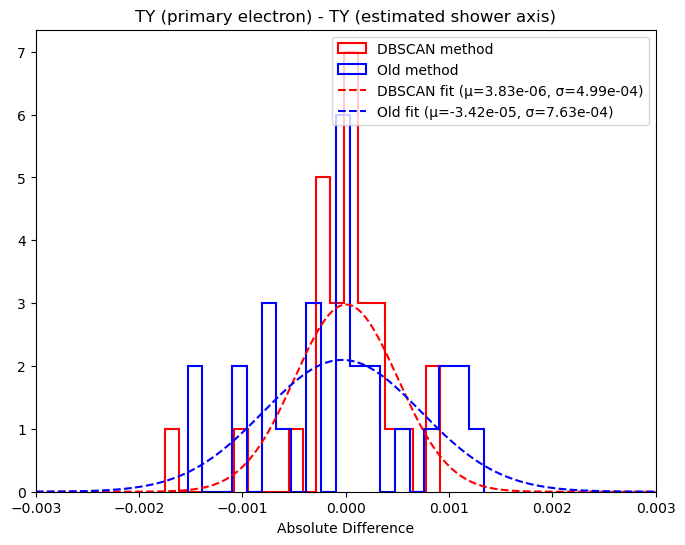

In [53]:
# Assuming axisYErr and axisYErrOld are already defined as NumPy arrays

# Fit Gaussian to axisYErr
mean_axisYErr, sigma_axisYErr = norm.fit(axisYErr)

# Fit Gaussian to axisYErrOld
mean_axisYErrOld, sigma_axisYErrOld = norm.fit(axisYErrOld)

# Create the plot
plt.figure(figsize=(8, 6))
plt.xlim(-0.003, 0.003)

# Plot histograms
counts1, bins1, _ = plt.hist(axisYErr, bins=20, color='red', linewidth=1.5, histtype='step', label="DBSCAN method")
counts2, bins2, _ = plt.hist(axisYErrOld, bins=20, color='blue', linewidth=1.5, histtype='step', label="Old method")

# Plot Gaussian fits
x = np.linspace(-0.003, 0.003, 1000)
plt.plot(x, norm.pdf(x, mean_axisYErr, sigma_axisYErr) * np.sum(counts1) * (bins1[1] - bins1[0]), 'r--', label=f'DBSCAN fit (μ={mean_axisYErr:.2e}, σ={sigma_axisYErr:.2e})')
plt.plot(x, norm.pdf(x, mean_axisYErrOld, sigma_axisYErrOld) * np.sum(counts2) * (bins2[1] - bins2[0]), 'b--', label=f'Old fit (μ={mean_axisYErrOld:.2e}, σ={sigma_axisYErrOld:.2e})')

# Add labels, title, and legend
plt.title('TY (primary electron) - TY (estimated shower axis)')
plt.xlabel('Absolute Difference')
plt.legend()

# Show the plot
plt.show()


### **Turns out that our DBSCAN method totally slayed our old method!!**